In [39]:
import pandas as pd
import numpy as np

from mrmr import mrmr_classif
import matplotlib.pyplot as plt

from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV


In [2]:
df = pd.read_csv("symbolCountsDEnorMeta.csv")
df = df.iloc[:,1:].set_index('sample')
df.drop(columns='lithium', inplace=True)
df.head()

,TAGLN2P1,SLPI,MIR23A,TRGV9,HSPA9P1,KLF2-DT,UTP14C,MIR27A,TMEM252-DT,RNU5A-1,...,MICE,OR2Q1P,OR5B15P,OR13I1P,OR8S21P,OR6R2P,tobacco,sex,age,BP_HC
sample,,,,,,,,,,,,,,,,,,,,,
089357B,133.436938,113.028935,17.268310,39.246158,34.536619,12.558771,191.521252,9.419078,10.988924,21.977849,...,0.0,6.279385,1.569846,1.569846,1.569846,0,0.0,F,18.97,Control
089366A,116.465837,27.108427,35.140554,124.497963,39.156617,13.052206,236.947737,14.056222,13.052206,5.020079,...,0.0,0.000000,1.004016,0.000000,1.004016,0,0.0,F,19.09,Control
089412B,149.905703,57.531378,21.878130,86.702218,41.325356,9.723613,260.106653,2.430903,4.051505,18.636925,...,0.0,0.000000,0.000000,0.000000,0.000000,0,1.0,F,23.28,Control
089425B,90.657305,34.387254,18.756684,51.059862,20.840760,13.546494,220.912054,4.168152,11.462418,6.252228,...,0.0,0.000000,0.000000,0.000000,0.000000,0,0.0,F,47.22,Control
089687A,175.309762,52.592929,15.777879,43.827441,47.333636,7.012390,261.211545,1.753098,17.530976,21.037171,...,0.0,0.000000,0.000000,1.753098,1.753098,0,0.0,F,52.37,Control


In [3]:
df.dropna(inplace=True)
df.shape

(448, 13866)

In [4]:
df.shape
df.sex = df.sex.map({'F':0,'M':1})
df.BP_HC = df.BP_HC.map({"Control":0,"BP1":1,"BP2":1})
df.head()

,TAGLN2P1,SLPI,MIR23A,TRGV9,HSPA9P1,KLF2-DT,UTP14C,MIR27A,TMEM252-DT,RNU5A-1,...,MICE,OR2Q1P,OR5B15P,OR13I1P,OR8S21P,OR6R2P,tobacco,sex,age,BP_HC
sample,,,,,,,,,,,,,,,,,,,,,
089357B,133.436938,113.028935,17.268310,39.246158,34.536619,12.558771,191.521252,9.419078,10.988924,21.977849,...,0.0,6.279385,1.569846,1.569846,1.569846,0,0.0,0,18.97,0
089366A,116.465837,27.108427,35.140554,124.497963,39.156617,13.052206,236.947737,14.056222,13.052206,5.020079,...,0.0,0.000000,1.004016,0.000000,1.004016,0,0.0,0,19.09,0
089412B,149.905703,57.531378,21.878130,86.702218,41.325356,9.723613,260.106653,2.430903,4.051505,18.636925,...,0.0,0.000000,0.000000,0.000000,0.000000,0,1.0,0,23.28,0
089425B,90.657305,34.387254,18.756684,51.059862,20.840760,13.546494,220.912054,4.168152,11.462418,6.252228,...,0.0,0.000000,0.000000,0.000000,0.000000,0,0.0,0,47.22,0
089687A,175.309762,52.592929,15.777879,43.827441,47.333636,7.012390,261.211545,1.753098,17.530976,21.037171,...,0.0,0.000000,0.000000,1.753098,1.753098,0,0.0,0,52.37,0


In [5]:
df.BP_HC.value_counts()

1    239
0    209
Name: BP_HC, dtype: int64

In [45]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [46]:
from mrmr import mrmr_classif
selected_features = mrmr_classif(X=X, y=y, K=10)

100%|██████████| 10/10 [00:28<00:00,  2.89s/it]


In [47]:
selected_features

['TAGLN2P1',
 'NOLC1P1',
 'UBL5P2',
 'tobacco',
 'RN7SKP70',
 'VTRNA1-1',
 'age',
 'TBC1D22B',
 'MIR23A',
 'SLPI']

In [10]:
model = SGDClassifier(loss="log", penalty="l2", random_state=42)

In [11]:
from sklearn.model_selection import train_test_split
X = df[selected_features]
Y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=0)

In [12]:
model.fit(X_train, y_train)

SGDClassifier(loss='log', random_state=42)

In [13]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[21 26]
 [ 4 39]]


In [14]:
classifier_rf=RandomForestClassifier(n_estimators=20,criterion="entropy")
classifier_rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [15]:
y_pred= classifier_rf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[39  8]
 [14 29]]


In [16]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'bootstrap': bootstrap}
print(random_grid)           

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'bootstrap': [True, False]}


In [17]:
classifier_rf=RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = classifier_rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.7min finished


{'n_estimators': 800, 'max_depth': 100, 'bootstrap': True}

In [18]:
RF_best = RandomForestClassifier(n_estimators=800,max_depth=100,bootstrap=False)
RF_best.fit(X_train,y_train)
y_pred= RF_best.predict(X_test)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[38  9]
 [ 8 35]]


In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [0,10, 30, 60, 100],
    'n_estimators': [200, 500, 1000,1200,1800]

}
grid_search = GridSearchCV(estimator = classifier_rf, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   55.9s finished


{'bootstrap': True, 'max_depth': 10, 'n_estimators': 1800}

In [20]:
RF_best2 = RandomForestClassifier(n_estimators=1800,max_depth=10,bootstrap=False)
RF_best2.fit(X_train,y_train)
y_pred= RF_best2.predict(X_test)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[41  6]
 [ 8 35]]


In [25]:
# XGB
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42, eval_metric='mlogloss'
)

In [26]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    cv = 10,
    verbose=True
)

In [27]:
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:  1.3min finished


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=Non

In [28]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4, nthread=4,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=42, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [29]:
XGB_best = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=2, min_child_weight=1, 
              monotone_constraints='()', n_estimators=100, n_jobs=4, nthread=4,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=42, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [30]:
XGB_best.fit(X_train,y_train)
y_pred= XGB_best.predict(X_test)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[35 12]
 [ 9 34]]


In [42]:
from sklearn.svm import SVC
svc = SVC()
param_grid = {'C':[1,10,100],'gamma':[1,0.1,0.01], 'kernel':['linear','rbf']}
grid_svc = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
grid_svc.fit(X_train,y_train)
grid_svc.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.8s
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ...................... C=1, gamma=1, kernel=linear, total=   1.9s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   3.1s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   1.1s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   1.5s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 12.0min finished


{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [43]:
SVC_best = SVC(C=1, gamma=1, kernel='linear',probability=True)   
SVC_best.fit(X_train,y_train)
y_pred= SVC_best.predict(X_test)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[37 10]
 [ 9 34]]


In [32]:
from catboost import CatBoostClassifier
CBC = CatBoostClassifier()
parameters = {'depth' : [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
                 }
Grid_CBC = GridSearchCV(estimator=CBC, param_grid = parameters, cv = 4, n_jobs=-1)
Grid_CBC.fit(X_train, y_train)                

0:	learn: 0.6892484	total: 64ms	remaining: 5.06s
1:	learn: 0.6855325	total: 71.8ms	remaining: 2.8s
2:	learn: 0.6820851	total: 78.6ms	remaining: 2.02s
3:	learn: 0.6791148	total: 87.3ms	remaining: 1.66s
4:	learn: 0.6754868	total: 95ms	remaining: 1.43s
5:	learn: 0.6720204	total: 103ms	remaining: 1.27s
6:	learn: 0.6692078	total: 111ms	remaining: 1.16s
7:	learn: 0.6666077	total: 119ms	remaining: 1.07s
8:	learn: 0.6626523	total: 125ms	remaining: 989ms
9:	learn: 0.6596910	total: 133ms	remaining: 929ms
10:	learn: 0.6564160	total: 140ms	remaining: 877ms
11:	learn: 0.6534834	total: 147ms	remaining: 833ms
12:	learn: 0.6502116	total: 155ms	remaining: 801ms
13:	learn: 0.6459061	total: 162ms	remaining: 765ms
14:	learn: 0.6430708	total: 170ms	remaining: 737ms
15:	learn: 0.6399003	total: 177ms	remaining: 707ms
16:	learn: 0.6370686	total: 184ms	remaining: 683ms
17:	learn: 0.6340488	total: 191ms	remaining: 657ms
18:	learn: 0.6307037	total: 198ms	remaining: 636ms
19:	learn: 0.6278335	total: 205ms	remaini

GridSearchCV(cv=4,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002C308C602B0>,
             n_jobs=-1,
             param_grid={'depth': [4, 5, 6, 7, 8, 9, 10],
                         'iterations': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                        100],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04]})

In [33]:
Grid_CBC.best_params_

{'depth': 8, 'iterations': 80, 'learning_rate': 0.03}

In [34]:
CBC_best= CatBoostClassifier(depth=8, iterations=80, learning_rate=0.03) 
CBC_best.fit(X_train,y_train)
y_pred= CBC_best.predict(X_test)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print(cm)

0:	learn: 0.6892484	total: 7.56ms	remaining: 597ms
1:	learn: 0.6855325	total: 16.1ms	remaining: 628ms
2:	learn: 0.6820851	total: 33.9ms	remaining: 871ms
3:	learn: 0.6791148	total: 50.5ms	remaining: 960ms
4:	learn: 0.6754868	total: 58.9ms	remaining: 884ms
5:	learn: 0.6720204	total: 69.6ms	remaining: 858ms
6:	learn: 0.6692078	total: 76.2ms	remaining: 794ms
7:	learn: 0.6666077	total: 84.3ms	remaining: 759ms
8:	learn: 0.6626523	total: 91ms	remaining: 718ms
9:	learn: 0.6596910	total: 98.5ms	remaining: 690ms
10:	learn: 0.6564160	total: 106ms	remaining: 663ms
11:	learn: 0.6534834	total: 112ms	remaining: 632ms
12:	learn: 0.6502116	total: 119ms	remaining: 611ms
13:	learn: 0.6459061	total: 124ms	remaining: 584ms
14:	learn: 0.6430708	total: 131ms	remaining: 567ms
15:	learn: 0.6399003	total: 136ms	remaining: 545ms
16:	learn: 0.6370686	total: 141ms	remaining: 524ms
17:	learn: 0.6340488	total: 149ms	remaining: 514ms
18:	learn: 0.6307037	total: 155ms	remaining: 497ms
19:	learn: 0.6278335	total: 161ms

In [35]:
import lightgbm as lgb
LGB = lgb.LGBMClassifier()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'min_split_gain': [0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9],
    'subsample_freq': [20]
}
Grid_LGB = GridSearchCV(estimator=LGB, param_grid = parameters, cv = 4, n_jobs=-1)
Grid_LGB.fit(X_train, y_train)       

[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations


GridSearchCV(cv=4, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'depth': [4, 5, 6, 7, 8, 9, 10],
                         'iterations': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                        100],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04]})

In [36]:
Grid_LGB.best_params_

{'depth': 4, 'iterations': 10, 'learning_rate': 0.03}

In [37]:
LGB_best = lgb.LGBMClassifier(depth=4, iterations=10, learning_rate=0.03)
LGB_best.fit(X_train,y_train)
y_pred= LGB_best.predict(X_test)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[35 12]
 [ 8 35]]


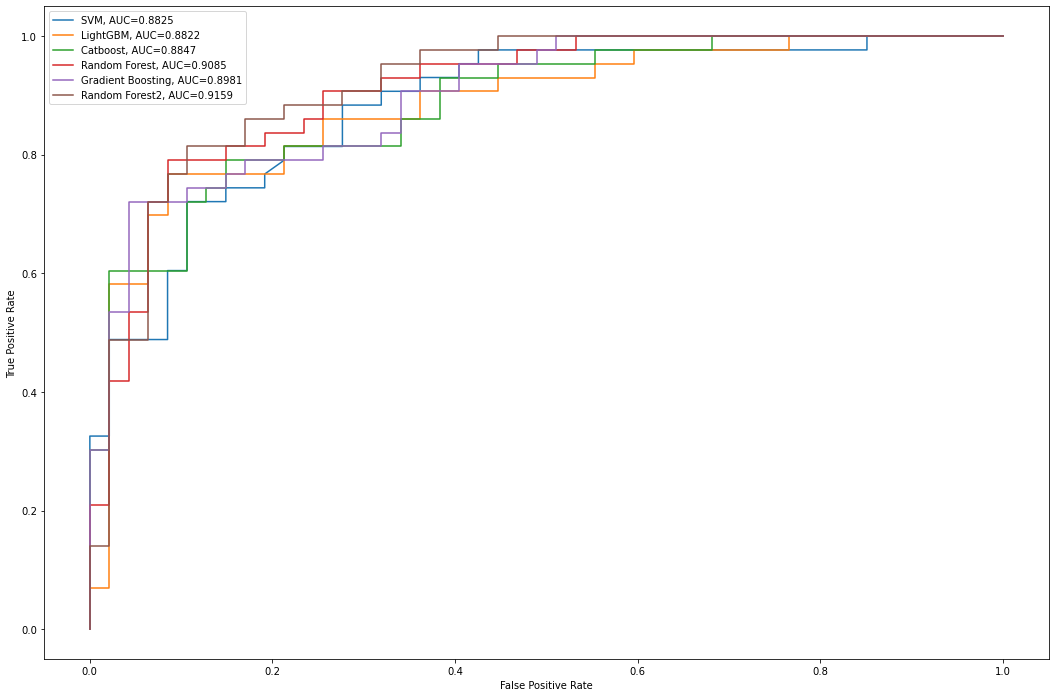

In [44]:
#set up plotting area
plt.rcParams["figure.figsize"] = (18,12)
plt.figure(0).clf()

y_pred = SVC_best.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))

y_pred = LGB_best.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="LightGBM, AUC="+str(auc))

y_pred = CBC_best.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Catboost, AUC="+str(auc))

y_pred = RF_best.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

y_pred = XGB_best.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

y_pred = RF_best2.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest2, AUC="+str(auc))

#add legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()